<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.727660,42.192484,22.071342,48.747979,0.002586,207.742051,207.739359,0.002692
1,0.0,1.0,38.041465,40.789013,48.638133,47.100945,0.001760,184.571316,184.569624,0.001692
2,0.0,2.0,90.173179,48.085738,85.792530,96.683630,0.001750,330.736826,330.735123,0.001703
3,0.0,3.0,34.789349,63.769378,33.484614,40.384370,-0.000011,182.427699,182.427883,-0.000184
4,0.0,4.0,22.980770,60.954319,75.432157,49.806257,-0.000183,219.173321,219.173606,-0.000285
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,26.470655,23.439293,94.402231,44.406548,0.001460,198.720187,198.719159,0.001028
19996,999.0,16.0,69.973749,78.115903,84.913199,44.734342,0.000138,287.737331,287.737077,0.000254
19997,999.0,17.0,89.476710,88.884093,29.373444,31.318665,-0.000254,249.052657,249.052363,0.000294
19998,999.0,18.0,20.803996,62.420826,54.904837,66.729666,0.000282,214.859607,214.860043,-0.000436


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.727660  42.192484  22.071342  48.747979  0.002586  207.742051   
      1.0    38.041465  40.789013  48.638133  47.100945  0.001760  184.571316   
      2.0    90.173179  48.085738  85.792530  96.683630  0.001750  330.736826   
      3.0    34.789349  63.769378  33.484614  40.384370 -0.000011  182.427699   
      4.0    22.980770  60.954319  75.432157  49.806257 -0.000183  219.173321   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   26.470655  23.439293  94.402231  44.406548  0.001460  198.720187   
      16.0   69.973749  78.115903  84.913199  44.734342  0.000138  287.737331   
      17.0   89.476710  88.884093  29.373444  31.318665 -0.000254  249.052657   
      18.0   20.803996  62.420826  54.904837  66.729666  0.000282  214.859607   
      19.0   56.924452  39.999223  75.793435  48.807888  0.000622  231.525620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.739359  0.002692  
      1.0    184.569624  0.001692  
      2.0    330.735123  0.001703  
      3.0    182.427883 -0.000184  
      4.0    219.173606 -0.000285  
...                 ...       ...  
999.0 15.0   198.719159  0.001028  
      16.0   287.737077  0.000254  
      17.0   249.052363  0.000294  
      18.0   214.860043 -0.000436  
      19.0   231.524826  0.000795  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.727660  42.192484  22.071342  48.747979  0.002586  207.742051   
      1.0    38.041465  40.789013  48.638133  47.100945  0.001760  184.571316   
      2.0    90.173179  48.085738  85.792530  96.683630  0.001750  330.736826   
      3.0    34.789349  63.769378  33.484614  40.384370 -0.000011  182.427699   
      4.0    22.980770  60.954319  75.432157  49.806257 -0.000183  219.173321   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   26.470655  23.439293  94.402231  44.406548  0.001460  198.720187   
      16.0   69.973749  78.115903  84.913199  44.734342  0.000138  287.737331   
      17.0   89.476710  88.884093  29.373444  31.318665 -0.000254  249.052657   
      18.0   20.803996  62.420826  54.904837  66.729666  0.000282  214.859607   
      19.0   56.924452  39.999223  75.793435  48.807888  0.000622  231.525620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.739359  0.002692  
      1.0    184.569624  0.001692  
      2.0    330.735123  0.001703  
      3.0    182.427883 -0.000184  
      4.0    219.173606 -0.000285  
...                 ...       ...  
999.0 15.0   198.719159  0.001028  
      16.0   287.737077  0.000254  
      17.0   249.052363  0.000294  
      18.0   214.860043 -0.000436  
      19.0   231.524826  0.000795  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,84.727660,42.192484,22.071342,48.747979,0.002586,207.742051,207.739359,0.002692
1,0.0,1.0,38.041465,40.789013,48.638133,47.100945,0.001760,184.571316,184.569624,0.001692
2,0.0,2.0,90.173179,48.085738,85.792530,96.683630,0.001750,330.736826,330.735123,0.001703
3,0.0,3.0,34.789349,63.769378,33.484614,40.384370,-0.000011,182.427699,182.427883,-0.000184
4,0.0,4.0,22.980770,60.954319,75.432157,49.806257,-0.000183,219.173321,219.173606,-0.000285
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,26.470655,23.439293,94.402231,44.406548,0.001460,198.720187,198.719159,0.001028
19996,999.0,16.0,69.973749,78.115903,84.913199,44.734342,0.000138,287.737331,287.737077,0.000254
19997,999.0,17.0,89.476710,88.884093,29.373444,31.318665,-0.000254,249.052657,249.052363,0.000294
19998,999.0,18.0,20.803996,62.420826,54.904837,66.729666,0.000282,214.859607,214.860043,-0.000436


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    84.727660  42.192484  22.071342  48.747979  0.002586  207.742051   
      1.0    38.041465  40.789013  48.638133  47.100945  0.001760  184.571316   
      2.0    90.173179  48.085738  85.792530  96.683630  0.001750  330.736826   
      3.0    34.789349  63.769378  33.484614  40.384370 -0.000011  182.427699   
      4.0    22.980770  60.954319  75.432157  49.806257 -0.000183  219.173321   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   26.470655  23.439293  94.402231  44.406548  0.001460  198.720187   
      16.0   69.973749  78.115903  84.913199  44.734342  0.000138  287.737331   
      17.0   89.476710  88.884093  29.373444  31.318665 -0.000254  249.052657   
      18.0   20.803996  62.420826  54.904837  66.729666  0.000282  214.859607   
      19.0   56.924452  39.999223  75.793435  48.807888  0.000622  231.525620   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    207.739359  0.002692  
      1.0    184.569624  0.001692  
      2.0    330.735123  0.001703  
      3.0    182.427883 -0.000184  
      4.0    219.173606 -0.000285  
...                 ...       ...  
999.0 15.0   198.719159  0.001028  
      16.0   287.737077  0.000254  
      17.0   249.052363  0.000294  
      18.0   214.860043 -0.000436  
      19.0   231.524826  0.000795  

[20000 rows x 8 columns]

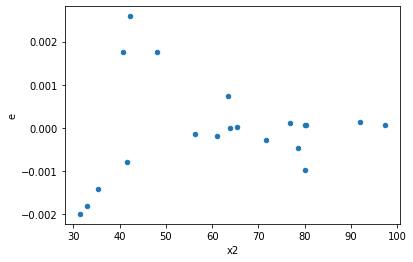

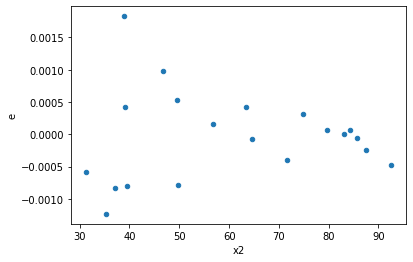

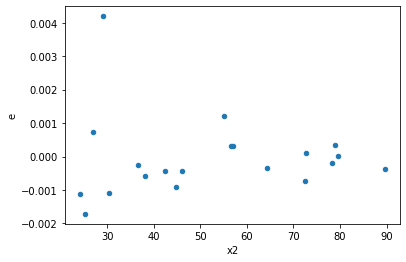

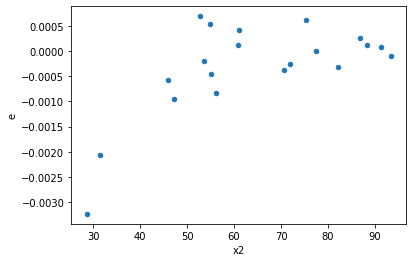

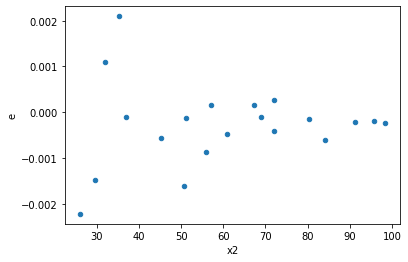

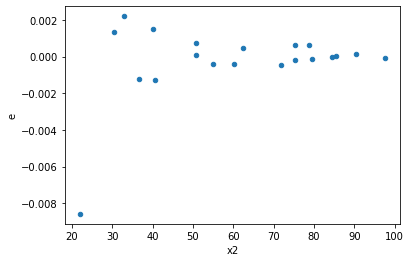

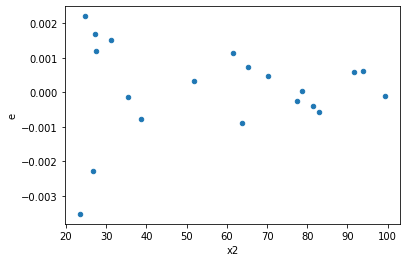

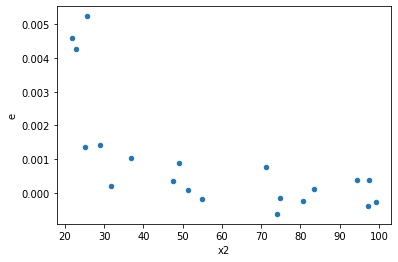

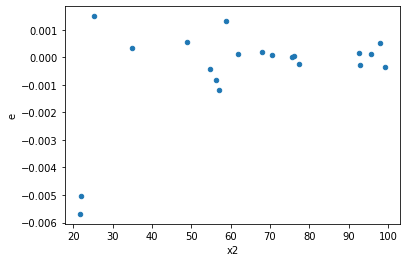

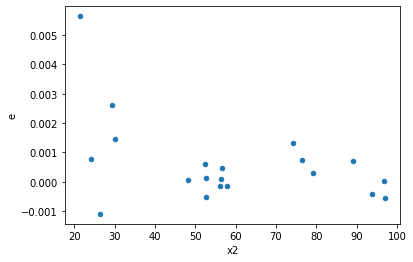

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,3.0,9.0,6.242930494997708e-08,1.705284121460292e-05,2.0809768316659027e-08,1.8947601349558801e-06,91.05147669707841,9.439874482097821e-07,0.9999995280062759,4.7199372410489104e-07,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,5.920790256767937e-07,6.635993951755087e-05,9.867983761279894e-08,1.1059989919591811e-05,112.07953100803758,1.364894817124096e-05,0.9999931755259144,6.82447408562048e-06,Reject001=0 : Heteroscedasticity
6.0,6.0,6.0,3.295084853463526e-06,1.9188905863871643e-05,5.491808089105876e-07,3.1981509773119403e-06,5.823493693554453,0.04992458649458564,0.9750377067527072,0.02496229324729282,Reject001=1 : Homoscedasticity
10.0,4.0,8.0,2.9060317430049075e-08,3.0539517573506074e-05,7.265079357512269e-09,3.817439696688259e-06,525.4505159315203,2.0609796091974886e-09,0.9999999989695102,1.0304898045987443e-09,Reject001=0 : Heteroscedasticity
12.0,4.0,8.0,4.227339050634726e-07,9.340555995678765e-07,1.0568347626586814e-07,1.1675694994598456e-07,1.1047796123989984,0.8345243083234164,0.5827378458382918,0.4172621541617082,Reject001=1 : Homoscedasticity
15.0,6.0,6.0,1.0197272631689166e-06,4.473711578032564e-06,1.699545438614861e-07,7.456185963387606e-07,4.387164823003755,0.09494901409846301,0.9525254929507685,0.04747450704923151,Reject001=1 : Homoscedasticity
16.0,6.0,6.0,2.0237585597474754e-06,3.58687473620215e-05,3.372930932912459e-07,5.978124560336917e-06,17.723827375187092,0.002807943694612458,0.9985960281526938,0.001403971847306229,Reject001=0 : Heteroscedasticity
17.0,6.0,6.0,2.2424369158161125e-06,5.488769825186908e-06,3.7373948596935207e-07,9.147949708644847e-07,2.4476808183428096,0.300336408027821,0.8498317959860895,0.1501682040139105,Reject001=1 : Homoscedasticity
22.0,6.0,6.0,4.0600728587236735e-06,4.9824024714730604e-05,6.766788097872789e-07,8.304004119121767e-06,12.271707047738376,0.007617754933948229,0.9961911225330259,0.0038088774669741143,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,3.0,1.4329694524960985e-05,1.7324698009775628e-07,1.5921882805512205e-06,5.774899336591876e-08,0.036270203763794744,0.0001441396006819013,Reject001=0 : Heteroscedasticity
1.0,6.0,6.0,3.5808499425970335e-06,1.442508602424187e-06,5.968083237661723e-07,2.4041810040403114e-07,0.4028397239617359,0.2930274417972113,Reject001=1 : Homoscedasticity
2.0,3.0,9.0,6.242930494997708e-08,1.705284121460292e-05,2.0809768316659027e-08,1.8947601349558801e-06,91.05147669707841,9.439874482097821e-07,Reject001=0 : Heteroscedasticity
3.0,11.0,1.0,5.37024510533633e-06,2.1971985020939798e-25,4.88204100485121e-07,2.1971985020939798e-25,4.500573632852852e-19,3.1120739687394737e-96,Reject001=0 : Heteroscedasticity
4.0,10.0,2.0,8.68496842518826e-06,1.202817695800342e-07,8.684968425188261e-07,6.01408847900171e-08,0.06924709664527474,0.0022505190706735554,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,5.920790256767937e-07,6.635993951755087e-05,9.867983761279894e-08,1.1059989919591811e-05,112.07953100803758,1.364894817124096e-05,Reject001=0 : Heteroscedasticity
6.0,6.0,6.0,3.295084853463526e-06,1.9188905863871643e-05,5.491808089105876e-07,3.1981509773119403e-06,5.823493693554453,0.04992458649458564,Reject001=1 : Homoscedasticity
7.0,12.0,1.0,1.605818158660609e-05,8.885729236409477e-26,1.338181798883841e-06,8.885729236409477e-26,6.640151019705201e-20,1.1547746356005133e-109,Reject001=0 : Heteroscedasticity
8.0,7.0,5.0,1.6060102413216042e-05,8.812516065862562e-07,2.294300344745149e-06,1.7625032131725125e-07,0.0768209453138661,0.003937175877285377,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      614
Reject001=0 : Heteroscedasticity    386
Name: Result_test, dtype: int64